In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

pd.options.display.max_colwidth = 100
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()

Saving Co2 emission data.csv to Co2 emission data.csv


Saving meta data.csv to meta data.csv


In [10]:
pd.read_csv('meta data.csv')

INDICATOR_CODE  \
0   SP.URB.TOTL.IN.ZS   
1         SP.URB.TOTL   
2         SP.URB.GROW   
3         SP.POP.TOTL   
4         SP.POP.GROW   
..                ...   
71  AG.LND.EL5M.RU.ZS   
72  AG.LND.EL5M.RU.K2   
73     AG.LND.ARBL.ZS   
74     AG.LND.AGRI.ZS   
75     AG.LND.AGRI.K2   

                                                              INDICATOR_NAME  \
0                                   Urban population (% of total population)   
1                                                           Urban population   
2                                         Urban population growth (annual %)   
3                                                          Population, total   
4                                               Population growth (annual %)   
..                                                                       ...   
71  Rural land area where elevation is below 5 meters (% of total land area)   
72                Rural land area where elevation is below 5 meters (sq. km)   
73                                              Arable land (% of land area)   
74                                        Agricultural land (% of land area)   
75                                                Agricultural land (sq. km)   

                                                                                            SOURCE_NOTE  \
0   Urban population refers to people living in urban areas as defined by national statistical offic...   
1   Urban population refers to people living in urban areas as defined by national statistical offic...   
2   Urban population refers to people living in urban areas as defined by national statistical offic...   
3   Total population is based on the de facto definition of population, which counts all residents r...   
4   Annual population growth rate for year t is the exponential rate of growth of midyear population...   
..                                                                                                  ...   
71  Rural land area below 5m is the percentage of total land where the rural land elevation is 5 met...   
72  Rural land area below 5m is the total rural land area in square kilometers where the elevation i...   
73  Arable land includes land defined by the FAO as land under temporary crops (double-cropped areas...   
74  Agricultural land refers to the share of land area that is arable, under permanent crops, and un...   
75  Agricultural land refers to the share of land area that is arable, under permanent crops, and un...   

                                                                                    SOURCE_ORGANIZATION  
0                      United Nations Population Division. World Urbanization Prospects: 2018 Revision.  
1   World Bank staff estimates based on the United Nations Population Division's World Urbanization ...  
2   World Bank staff estimates based on the United Nations Population Division's World Urbanization ...  
3   (1) United Nations Population Division. World Population Prospects: 2022 Revision. (2) Census re...  
4   Derived from total population. Population source: (1) United Nations Population Division. World ...  
..                                                                                                  ...  
71  Center for International Earth Science Information Network - CIESIN - Columbia University, and C...  
72  Center for International Earth Science Information Network - CIESIN - Columbia University, and C...  
73                                    Food and Agriculture Organization, electronic files and web site.  
74                                    Food and Agriculture Organization, electronic files and web site.  
75                                    Food and Agriculture Organization, electronic files and web site.  

[76 rows x 4 columns]

In [11]:
df = pd.read_csv('Co2 emission data.csv')
df

Country Name Country Code  \
0            Aruba          ABW   
1            Aruba          ABW   
2            Aruba          ABW   
3            Aruba          ABW   
4            Aruba          ABW   
...            ...          ...   
20211     Zimbabwe          ZWE   
20212     Zimbabwe          ZWE   
20213     Zimbabwe          ZWE   
20214     Zimbabwe          ZWE   
20215     Zimbabwe          ZWE   

                                                                 Indicator Name  \
0                                      Urban population (% of total population)   
1                                                              Urban population   
2                                            Urban population growth (annual %)   
3                                                             Population, total   
4                                                  Population growth (annual %)   
...                                                                         ...   
20211  Rural land area where elevation is below 5 meters (% of total land area)   
20212                Rural land area where elevation is below 5 meters (sq. km)   
20213                                              Arable land (% of land area)   
20214                                        Agricultural land (% of land area)   
20215                                                Agricultural land (sq. km)   

          Indicator Code       1960           1961           1962  \
0      SP.URB.TOTL.IN.ZS     50.776      50.761000      50.746000   
1            SP.URB.TOTL  27728.000   28330.000000   28764.000000   
2            SP.URB.GROW        NaN       2.147858       1.520329   
3            SP.POP.TOTL  54608.000   55811.000000   56682.000000   
4            SP.POP.GROW        NaN       2.179059       1.548572   
...                  ...        ...            ...            ...   
20211  AG.LND.EL5M.RU.ZS        NaN            NaN            NaN   
20212  AG.LND.EL5M.RU.K2        NaN            NaN            NaN   
20213     AG.LND.ARBL.ZS        NaN       4.872690       5.001939   
20214     AG.LND.AGRI.ZS        NaN      28.396019      28.615743   
20215     AG.LND.AGRI.K2        NaN  109850.000000  110700.000000   

                1963           1964           1965           1966  \
0          50.730000      50.715000      50.700000      50.685000   
1       29157.000000   29505.000000   29802.000000   30052.000000   
2           1.357042       1.186472       1.001576       0.835371   
3       57475.000000   58178.000000   58782.000000   59291.000000   
4           1.389337       1.215721       1.032841       0.862184   
...              ...            ...            ...            ...   
20211            NaN            NaN            NaN            NaN   
20212            NaN            NaN            NaN            NaN   
20213       5.131188       5.260437       5.337986       5.518935   
20214      28.835466      29.055189      29.223213      29.494636   
20215  111550.000000  112400.000000  113050.000000  114100.000000   

                1967           1968           1969           1970  \
0          50.670000      50.654000      50.639000      50.624000   
1       30160.000000   30124.000000   30044.000000   29922.000000   
2           0.358733      -0.119435      -0.265922      -0.406898   
3       59522.000000   59471.000000   59330.000000   59106.000000   
4           0.388847      -0.085719      -0.237372      -0.378264   
...              ...            ...            ...            ...   
20211            NaN            NaN            NaN            NaN   
20212            NaN            NaN            NaN            NaN   
20213       5.648184       5.777433       5.906682       6.035931   
20214      29.714360      29.934083      30.153806      30.373530   
20215  114950.000000  115800.000000  116650.000000  117500.000000   

                1971           1972           1973           1974  \
0          50.609000      50.593

In [15]:
(df.isnull().mean()*100)#.sort_values(ascending=False).head(50)

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
1960              87.663237
                    ...    
2017              59.917887
2018              59.833795
2019              59.106648
2020              74.094776
2021              83.973091
Length: 66, dtype: float64

<Axes: >

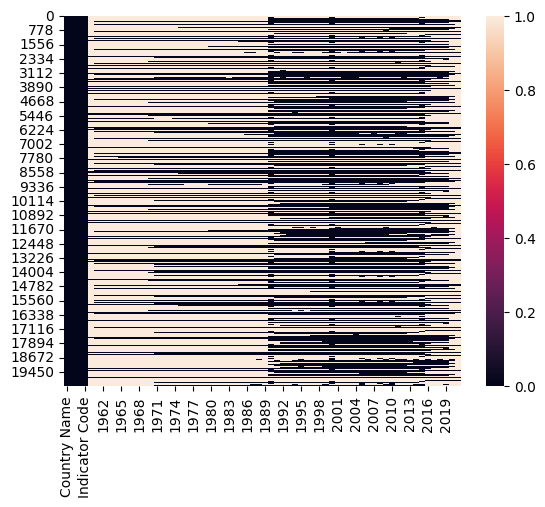

In [16]:
### Lets visualize missing values
sns.heatmap(df.isnull())

In [128]:
# As we can observe that for few years there is very large chunk of data missing so lets drop them

columns_drop= ['1960', '1961', '1962','1963', '1964', '1965', '1966', '1967', '1968', \
'1969', '1970', '1971','1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', \
'1984', '1985', '1986', '1987', '1988', '1989', '2021', '2020']
df.drop(columns=columns_drop, axis=1, inplace= True)

We can observe that for earlier years there were a lot of missing values compared to recent year, we will process NaN values section wise later


# Heat map of country wise co2 emission

In [191]:
df_co2temp = df[df['Indicator']== 'CO2 emissions (metric tons per capita)']
#print((df_co2temp.isnull().mean()*100).sort_values(ascending= False))#.head(10)

fig = px.choropleth(
    df_co2temp,
    locations="Code",
    color="2019",
    hover_name="Country",
    hover_data=["2019"],
    title="CO2 Emission(metric tons per capita) Around the world in 2019",
    color_continuous_scale=px.colors.sequential.Blues,
    
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [17]:
df = df.rename(columns={'Country Name': 'Country', 'Country Code': 'Code', 'Indicator Name': 'Indicator', 'Indicator Code': 'IndicatorCode'})


In [113]:
df.head(3)

Country Code                                 Indicator      IndicatorCode  \
0   Aruba  ABW  Urban population (% of total population)  SP.URB.TOTL.IN.ZS   
1   Aruba  ABW                          Urban population        SP.URB.TOTL   
2   Aruba  ABW        Urban population growth (annual %)        SP.URB.GROW   

        1960          1961          1962          1963          1964  \
0     50.776     50.761000     50.746000     50.730000     50.715000   
1  27728.000  28330.000000  28764.000000  29157.000000  29505.000000   
2        NaN      2.147858      1.520329      1.357042      1.186472   

           1965          1966          1967          1968          1969  \
0     50.700000     50.685000     50.670000     50.654000     50.639000   
1  29802.000000  30052.000000  30160.000000  30124.000000  30044.000000   
2      1.001576      0.835371      0.358733     -0.119435     -0.265922   

           1970          1971          1972          1973          1974  \
0     50.624000     50.609000     50.593000     50.578000     50.563000   
1  29922.000000  29766.000000  29777.000000  30026.000000  30352.000000   
2     -0.406898     -0.522719      0.036948      0.832739      1.079874   

           1975          1976         1977          1978          1979  \
0     50.548000     50.532000     50.51700     50.502000     50.487000   
1  30690.000000  30922.000000  31050.00000  31179.000000  31305.000000   
2      1.107446      0.753104      0.41309      0.414598      0.403304   

           1980          1981          1982          1983        1984  \
0     50.472000     50.456000     50.441000     50.426000     50.4110   
1  31427.000000  31593.000000  31836.000000  32113.000000  32351.0000   
2      0.388957      0.526818      0.766215      0.866321      0.7384   

           1985          1986          1987          1988          1989  \
0     50.395000     50.380000     50.365000     50.350000     50.335000   
1  32494.000000  32522.000000  32460.000000  32391.000000  32514.000000   
2      0.441052      0.086133     -0.190822     -0.212796      0.379016   

          1990          1991          1992          1993         1994  \
0     50.31900     50.304000     49.998000     49.588000     49.17700   
1  33066.00000  34138.000000  35095.000000  35882.000000  36740.00000   
2      1.68348      3.190557      2.764754      2.217711      2.36303   

           1995          1996          1997          1998          1999  \
0     48.767000     48.356000     47.946000     47.536000     47.127000   
1  37575.000000  38403.000000  39248.000000  40099.000000  40938.000000   
2      2.247286      2.179665      2.176491      2.145091      2.070733   

           2000          2001          2002          2003          2004  \
0     46.717000     46.339000     45.972000     45.606000     45.240000   
1  41625.000000  42025.000000  42194.000000  42277.000000  42317.000000   
2      1.664222      0.956373      0.401335      0.196517      0.094569   

           2005          2006          2007          2008          2009  \
0     44.875000     44.511000     44.147000     43.783000     43.421000   
1  42399.000000  42555.000000  42729.000000  42906.000000  43079.000000   
2      0.193588      0.367258      0.408049      0.413383      0.402396   

           2010          2011          2012          2013          2014  \
0     43.059000     42.940000     42.957000     42.990000     43.041000   
1  43206.000000  43493.000000  43864.000000  44228.000000  44588.000000   
2      0.294374      0.662063      0.849393      0.826413      0.810669   

           2015          2016          2017          2018          2019  \
0     43.108000     43.192000     43.293000     43.411000     43.546000   
1  44943.000000  45297.000000  45648.000000  45999.000000  46351.000000   
2      0.793026      0.784578      0.771899      0.765986      0.762321   

           2020          2021  
0     43.697000     43.866000  
1  46574.000000  46734.000000  
2      0.

In [164]:
df.Country.unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

# Country wise analysis

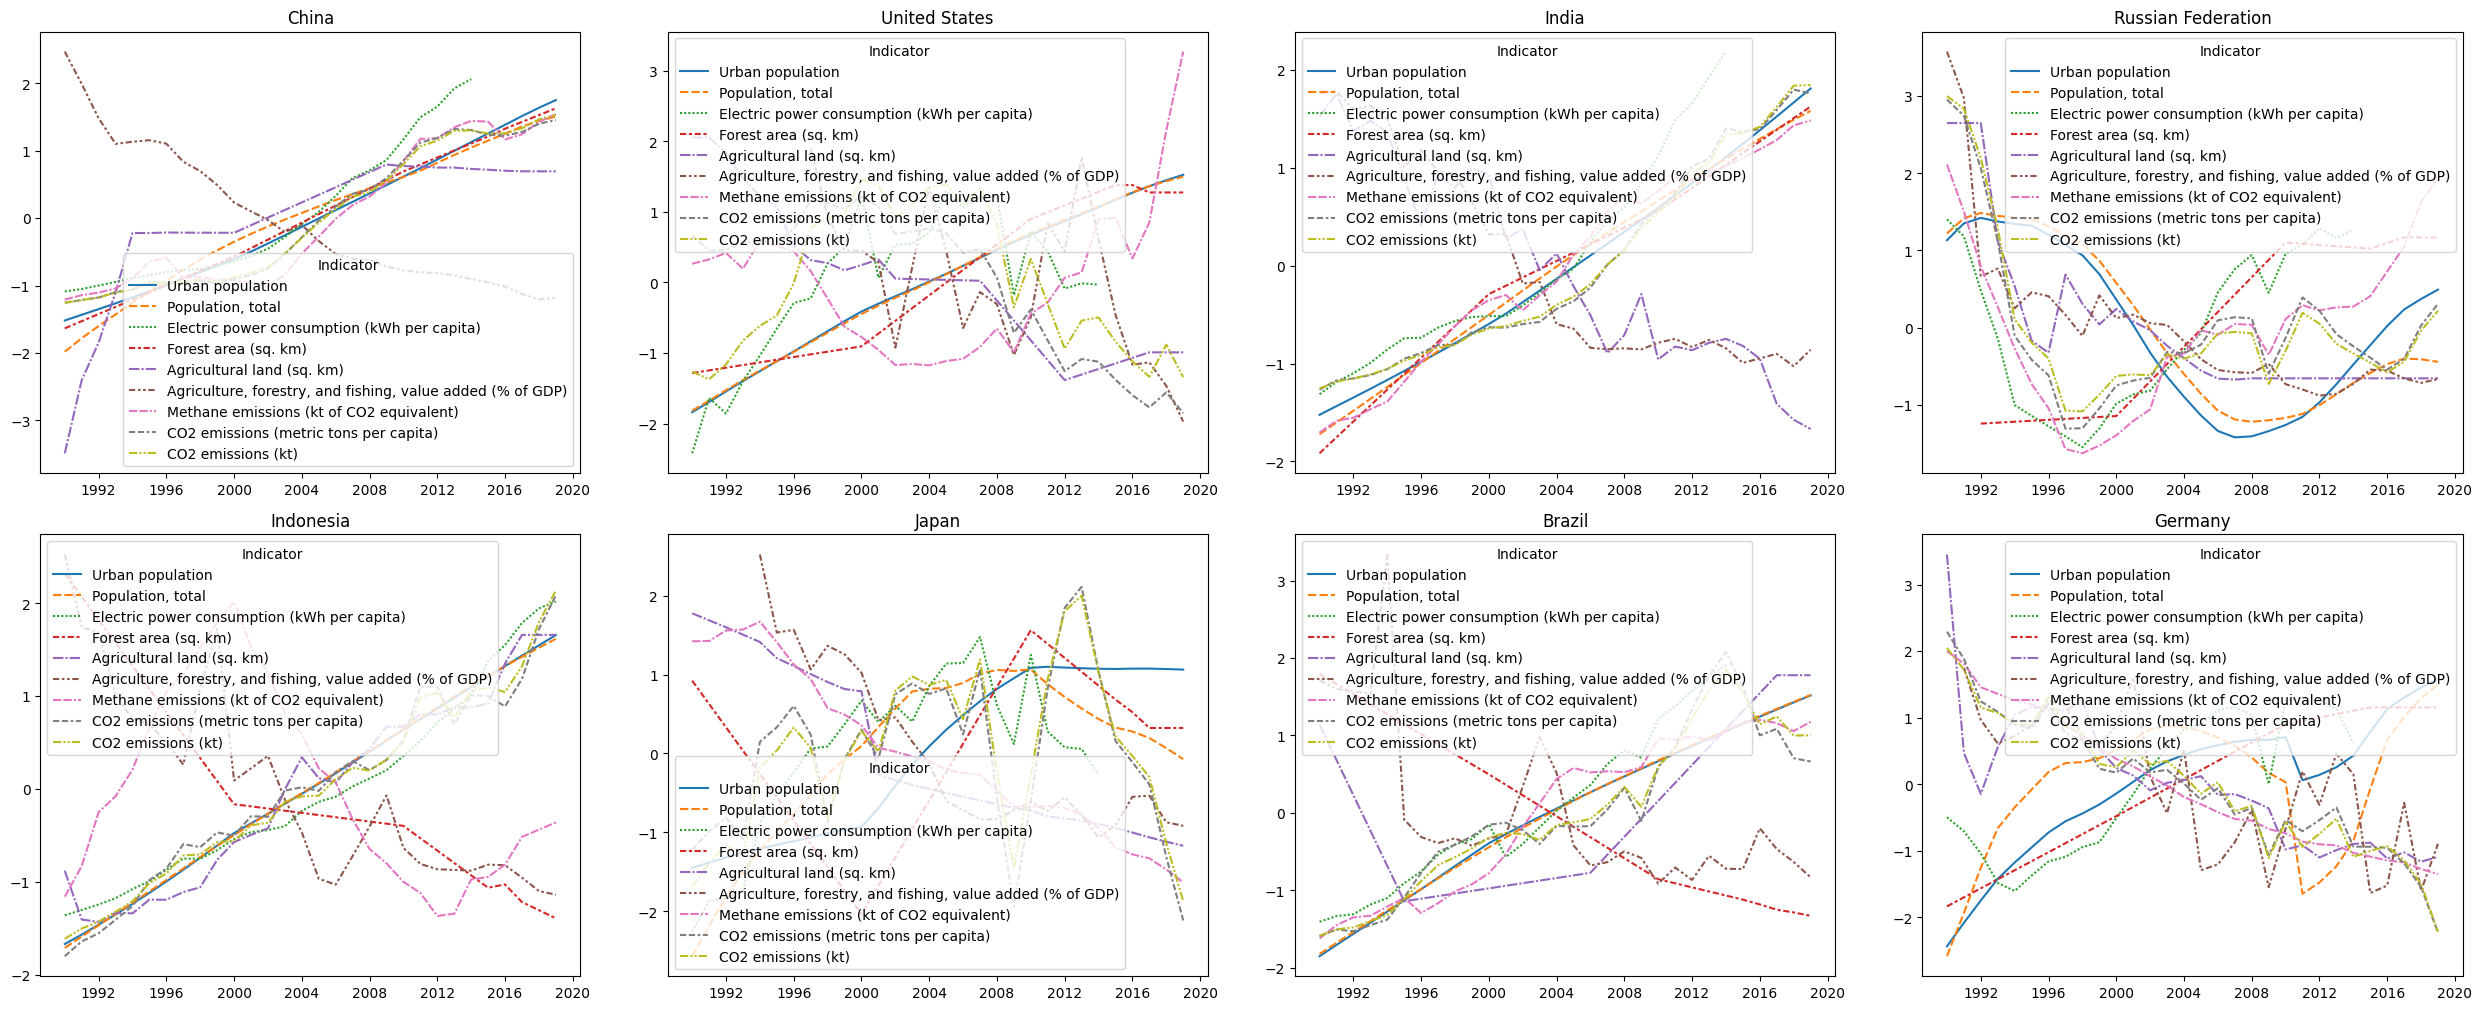

In [189]:
country_list= ['China', 'United States', 'India', 'Russian Federation', 'Indonesia', 'Japan', 'Brazil', 'Germany']
scale = StandardScaler()
plt.figure(figsize=(25,15))
for i in range(len(country_list)):
  df_con = df[df['Country']== country_list[i]]
  df_con.drop(columns= ['Country','Code','IndicatorCode'], inplace=True)
  df_con.set_index('Indicator', inplace=True)
  df_con= df_con.T
  df_con.index = pd.to_datetime(df_con.index)

  col= [ 'Urban population','Population, total','Electric power consumption (kWh per capita)','Forest area (sq. km)',
        'Agricultural land (sq. km)','Agriculture, forestry, and fishing, value added (% of GDP)',
        'Methane emissions (kt of CO2 equivalent)',
        'CO2 emissions (metric tons per capita)','CO2 emissions (kt)']


  ### Scale
 
  X = df_con[col]
  scaledX = scale.fit_transform(X)
  df_con_scaled= pd.DataFrame(scaledX, columns= X.columns, index= X.index)
  df_con_scaled.head(2)

  plt.subplot(3,4,(i+1))
  #plt.plot(df_con_scaled)#, figsize=(15,8), title=country_list[i]
  sns.lineplot(df_con_scaled)
  plt.title(country_list[i])

plt.tight_layout()
#plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 8)
plt.show()

# Anayse 

Indicator   Access to electricity (% of population)  \
2015-01-01                             21835.020440   
2016-01-01                             22137.976966   
2017-01-01                             22325.287007   
2018-01-01                             22425.724312   
2019-01-01                             22650.537674   

Indicator   Agricultural irrigated land (% of total agricultural land)  \
2015-01-01                                                  603.921682   
2016-01-01                                                  702.273629   
2017-01-01                                                  614.185451   
2018-01-01                                                  646.544657   
2019-01-01                                                  682.311857   

Indicator   Agricultural land (% of land area)  Agricultural land (sq. km)  \
2015-01-01                         9554.418123                5.023684e+08   
2016-01-01                         9554.026680                5.024417e+08   
2017-01-01                         9577.157503                5.050612e+08   
2018-01-01                         9560.773128                5.041178e+08   
2019-01-01                         9554.983426                5.040976e+08   

Indicator   Agriculture, forestry, and fishing, value added (% of GDP)  \
2015-01-01                                                 2594.315941   
2016-01-01                                                 2568.793124   
2017-01-01                                                 2553.191104   
2018-01-01                                                 2451.317579   
2019-01-01                                                 2411.964494   

Indicator   Annual freshwater withdrawals, total (% of internal resources)  \
2015-01-01                                                    22057.015941   
2016-01-01                                                    21956.220593   
2017-01-01                                                    23704.015948   
2018-01-01                                                    23725.396709   
2019-01-01                                                    23780.730259   

Indicator   Annual freshwater withdrawals, total (billion cubic meters)  \
2015-01-01                                                 39285.929517   
2016-01-01                                                 39624.760216   
2017-01-01                                                 40026.535162   
2018-01-01                                                 39945.497506   
2019-01-01                                                 40089.898830   

Indicator   Arable land (% of land area)  \
2015-01-01                   3425.287076   
2016-01-01                   3427.853376   
2017-01-01                   3439.458577   
2018-01-01                   3432.375355   
2019-01-01                   3423.652594   

Indicator   Average precipitation in depth (mm per year)  \
2015-01-01                                      213060.1   
2016-01-01                                      213060.1   
2017-01-01                                      213060.1   
2018-01-01                                      213060.1   
2019-01-01                                      213060.1   

Indicator   CO2 emissions (kg per 2015 US$ of GDP)  \
2015-01-01                              110.513840   
2016-01-01                              110.766865   
2017-01-01                              109.887591   
2018-01-01                              108.715723   
2019-01-01                              106.678509   

Indicator   CO2 emissions (kg per 2017 PPP $ of GDP)  \
2015-01-01                                 50.879765   
2016-01-01                                 51.023331   
2017-01-01                                 50.539796   
2018-01-01                                 49.839137   
2019-01-01                                 49.008268   

Indicator   CO2 emissions (kg per PPP $ of GDP)  CO2 emissions (kt)  \
2015-01-01                     

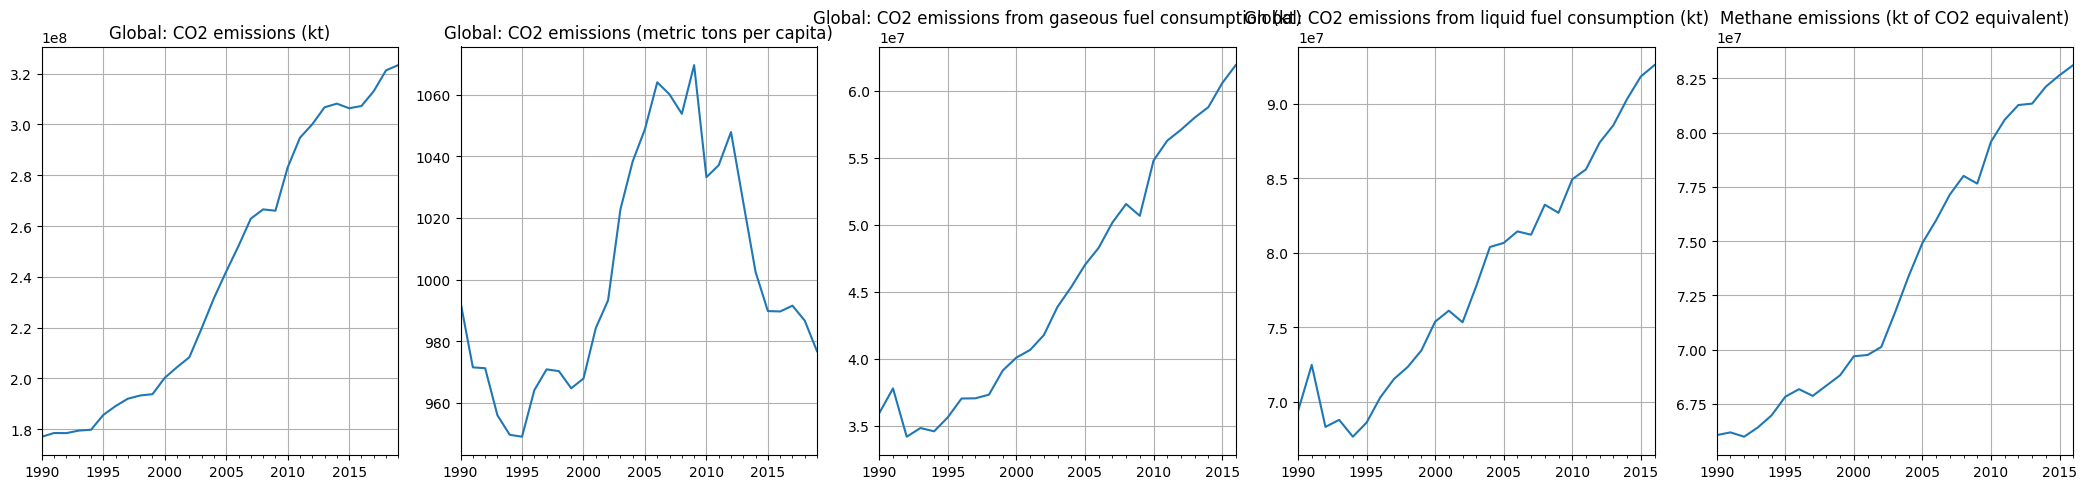

In [186]:
df_sum= df.copy()
df_sum.drop(columns= ['Country','Code', 'IndicatorCode'], inplace=True)
df_sum= df_sum.groupby('Indicator').sum().T
df_sum.index= pd.to_datetime(df_sum.index)

plt.figure(figsize=(21,5))
plt.subplot(1,5,1)
df_sum['CO2 emissions (kt)'].plot(title = 'Global: CO2 emissions (kt)')
plt.grid(True)
plt.subplot(1,5,2)
df_sum['CO2 emissions (metric tons per capita)'].plot(title = 'Global: CO2 emissions (metric tons per capita)')
plt.grid(True)

plt.subplot(1,5,3)
df_sum['CO2 emissions from gaseous fuel consumption (kt)'].head(-3).plot(title = 'Global: CO2 emissions from gaseous fuel consumption (kt)')
plt.grid(True)
plt.subplot(1,5,4)
df_sum['CO2 emissions from liquid fuel consumption (kt)'].head(-3).plot(title = 'Global: CO2 emissions from liquid fuel consumption (kt)')
plt.grid(True)


plt.subplot(1,5,5)
df_sum['Methane emissions (kt of CO2 equivalent)'].head(-3).plot(title = 'Methane emissions (kt of CO2 equivalent)')
plt.grid(True)


plt.tight_layout()

df_sum.tail()

In [192]:
# df.Indicator.unique()

In [ ]:
df_sum= df.copy()
df_sum.drop(columns= ['Country','Code', 'IndicatorCode'], inplace=True)
df_sum= df_sum.groupby('Indicator').sum().T
df_sum.index= pd.to_datetime(df_sum.index)

plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
df_sum['CO2 emissions (kt)'].plot(title = 'Global: CO2 emissions (kt)')
plt.grid(True)
plt.subplot(1,4,2)
df_sum['CO2 emissions (metric tons per capita)'].plot(title = 'Global: CO2 emissions (metric tons per capita)')
plt.grid(True)

plt.subplot(1,4,3)
df_sum['CO2 emissions from gaseous fuel consumption (kt)'].head(-3).plot(title = 'Global: CO2 emissions from gaseous fuel consumption (kt)')
plt.grid(True)
plt.subplot(1,4,4)
df_sum['CO2 emissions from liquid fuel consumption (kt)'].head(-3).plot(title = 'Global: CO2 emissions from liquid fuel consumption (kt)')
plt.grid(True)
plt.tight_layout()

In [19]:
df.Indicator.value_counts()

Urban population (% of total population)                                                      266
CO2 intensity (kg per kg of oil equivalent energy use)                                        266
Renewable electricity output (% of total electricity output)                                  266
Electricity production from renewable sources, excluding hydroelectric (kWh)                  266
Electricity production from renewable sources, excluding hydroelectric (% of total)           266
                                                                                             ... 
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                     266
Droughts, floods, extreme temperatures (% of population, average 1990-2009)                   266
Rural population living in areas where elevation is below 5 meters (% of total population)    266
Urban population living in areas where elevation is below 5 meters (% of total population)    266
Agricultural land (s

In [20]:
df_co2= df[df['Indicator']== 'CO2 emissions (kt)']
df_co2

Country Code           Indicator   IndicatorCode  \
44                           Aruba  ABW  CO2 emissions (kt)  EN.ATM.CO2E.KT   
120    Africa Eastern and Southern  AFE  CO2 emissions (kt)  EN.ATM.CO2E.KT   
196                    Afghanistan  AFG  CO2 emissions (kt)  EN.ATM.CO2E.KT   
272     Africa Western and Central  AFW  CO2 emissions (kt)  EN.ATM.CO2E.KT   
348                         Angola  AGO  CO2 emissions (kt)  EN.ATM.CO2E.KT   
...                            ...  ...                 ...             ...   
19880                       Kosovo  XKX  CO2 emissions (kt)  EN.ATM.CO2E.KT   
19956                  Yemen, Rep.  YEM  CO2 emissions (kt)  EN.ATM.CO2E.KT   
20032                 South Africa  ZAF  CO2 emissions (kt)  EN.ATM.CO2E.KT   
20108                       Zambia  ZMB  CO2 emissions (kt)  EN.ATM.CO2E.KT   
20184                     Zimbabwe  ZWE  CO2 emissions (kt)  EN.ATM.CO2E.KT   

       1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  \
44      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
120     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
196     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
272     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
348     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
19880   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
19956   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
20032   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
20108   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
20184   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  \
44      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
120     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
196     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
272     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
348     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
19880   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
19956   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
20032   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
20108   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
20184   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1984  1985  1986  1987  1988  1989          1990         1991  \
44      NaN   NaN   NaN   NaN   NaN   NaN           NaN          NaN   
120     NaN   NaN   NaN   NaN   NaN   NaN  304354.88270  298735.4356   
196     NaN   NaN   NaN   NaN   NaN   NaN    2380.00000    2230.0000   
272     NaN   NaN   NaN   NaN   NaN   NaN   97925.79689  111479.4705   
348     NaN   NaN   NaN   NaN   NaN   NaN    6560.00000    6670.0000   
...     ...   ...   ...   ...   ...   ...           ...          ...   
19880   NaN   NaN   NaN   NaN   NaN   NaN           NaN          NaN   
19956   NaN   NaN   NaN   NaN   NaN   NaN    6640.00000    8500.0000   
20032   NaN   NaN   NaN   NaN   NaN   NaN  247660.00000  242330.0000   
20108   NaN   NaN   NaN   NaN   NaN   NaN    2740.00000    2880.0000   
20184   NaN   NaN   NaN   NaN   NaN   NaN   16540.00000   18300.0000   

              1992         1993        1994         1995         1996  \
44             NaN          NaN         NaN          NaN          NaN   
120    295090.0000  303600.0000  312160.000  327430.0000  340070.0000   
196      1390.0000    1340.0000    1290.000    1

In [21]:
df_new= df.groupby('Indicator').sum().T
df_new

Indicator  Access to electricity (% of population)  \
1960                                      0.000000   
1961                                      0.000000   
1962                                      0.000000   
1963                                      0.000000   
1964                                      0.000000   
...                                            ...   
2017                                  22325.287007   
2018                                  22425.724312   
2019                                  22650.537674   
2020                                  22724.420113   
2021                                      0.000000   

Indicator  Agricultural irrigated land (% of total agricultural land)  \
1960                                                         0.000000   
1961                                                         0.000000   
1962                                                         0.000000   
1963                                                         0.000000   
1964                                                         0.000000   
...                                                               ...   
2017                                                       614.185451   
2018                                                       646.544657   
2019                                                       682.311857   
2020                                                       655.884634   
2021                                                         0.000000   

Indicator  Agricultural land (% of land area)  Agricultural land (sq. km)  \
1960                                 0.000000                0.000000e+00   
1961                              9330.983850                4.665898e+08   
1962                              9339.511461                4.676179e+08   
1963                              9374.923595                4.689345e+08   
1964                              9395.153240                4.700139e+08   
...                                       ...                         ...   
2017                              9577.157503                5.050612e+08   
2018                              9560.773128                5.041178e+08   
2019                              9554.983426                5.040976e+08   
2020                              9562.807169                5.038075e+08   
2021                                 0.000000                0.000000e+00   

Indicator  Agriculture, forestry, and fishing, value added (% of GDP)  \
1960                                                      1824.827029   
1961                                                      2017.324673   
1962                                                      2033.181921   
1963                                                      2070.550671   
1964                                                      2035.171248   
...                                                               ...   
2017                                                      2553.191104   
2018                                                      2451.317579   
2019                                                      2411.964494   
2020                                                      2531.759820   
2021                                                      2234.345643   

Indicator  Annual freshwater withdrawals, total (% of internal resources)  \
1960                                                             0.000000   
1961                                                             0.000000   
1962                                                            37.500000   
1963                                                            39.375000   
1964                                                            41.250000   
...                                                                   ...   
2017                                                         23704.015948   
2018                                                    

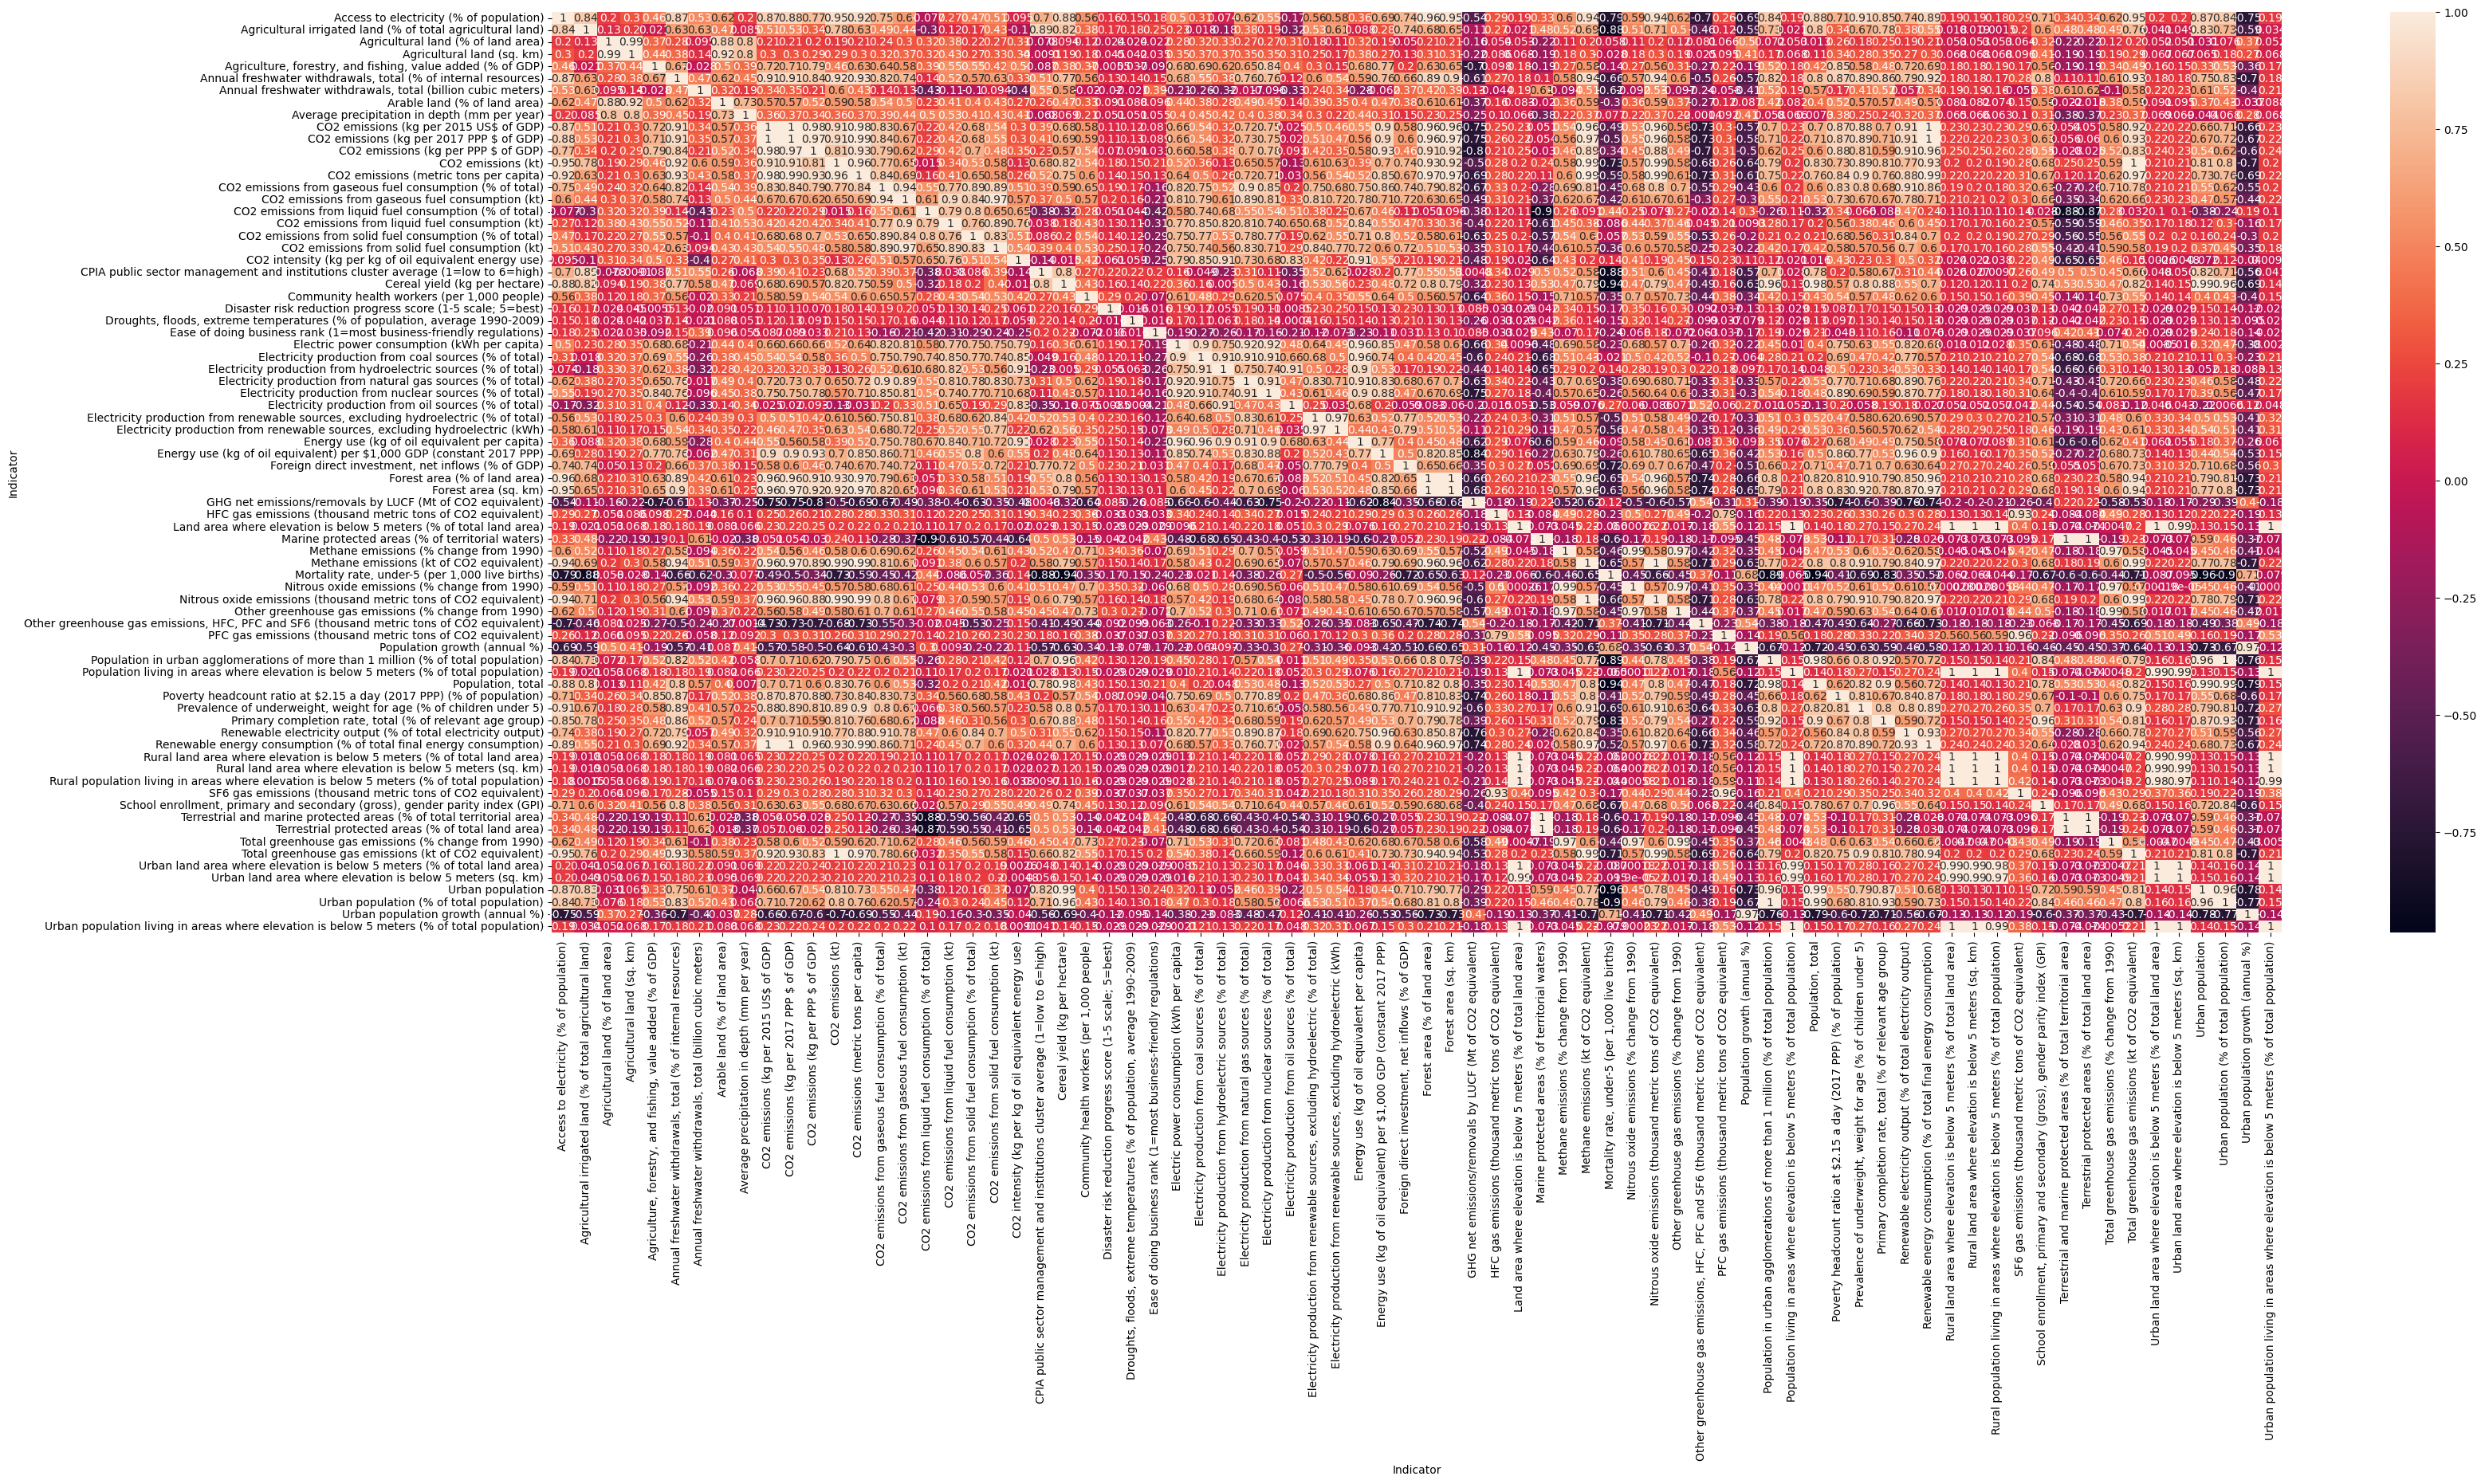

In [22]:
plt.figure(figsize=(35,15))
sns.heatmap(df_new.corr(), annot=True);

In [23]:
df_cor=df_new.corr()

In [24]:
threshold = 0.75
df_cor[df_cor.apply(lambda row: (row > threshold).any(), axis=1)]

Indicator                                                                                   Access to electricity (% of population)  \
Indicator                                                                                                                             
Access to electricity (% of population)                                                                                    1.000000   
Agricultural irrigated land (% of total agricultural land)                                                                 0.835864   
Agricultural land (% of land area)                                                                                         0.200698   
Agricultural land (sq. km)                                                                                                 0.297222   
Agriculture, forestry, and fishing, value added (% of GDP)                                                                 0.464664   
...                                                                                                                             ...   
Urban land area where elevation is below 5 meters (sq. km)                                                                 0.199398   
Urban population                                                                                                           0.869224   
Urban population (% of total population)                                                                                   0.843965   
Urban population growth (annual %)                                                                                        -0.745369   
Urban population living in areas where elevation is below 5 meters (% of total population)                                 0.192807   

Indicator                                                                                   Agricultural irrigated land (% of total agricultural land)  \
Indicator                                                                                                                                                
Access to electricity (% of population)                                                                                                       0.835864   
Agricultural irrigated land (% of total agricultural land)                                                                                    1.000000   
Agricultural land (% of land area)                                                                                                            0.128035   
Agricultural land (sq. km)                                                                                                                    0.202053   
Agriculture, forestry, and fishing, value added (% of GDP)                                                                                    0.020757   
...                                                                                                                                                ...   
Urban land area where elevation is below 5 meters (sq. km)                                                                                    0.049049   
Urban population                                                                                                                              0.832792   
Urban population (% of total population)                                                                                                      0.730867   
Urban population growth (annual %)                                                                                                           -0.592913   
Urban population living in areas where elevation is below 5 meters (% of total population)                                                    0.034075   

Indicator                                                                                   Agricultural land (% of land area)  \
Indicator                                                                                                      

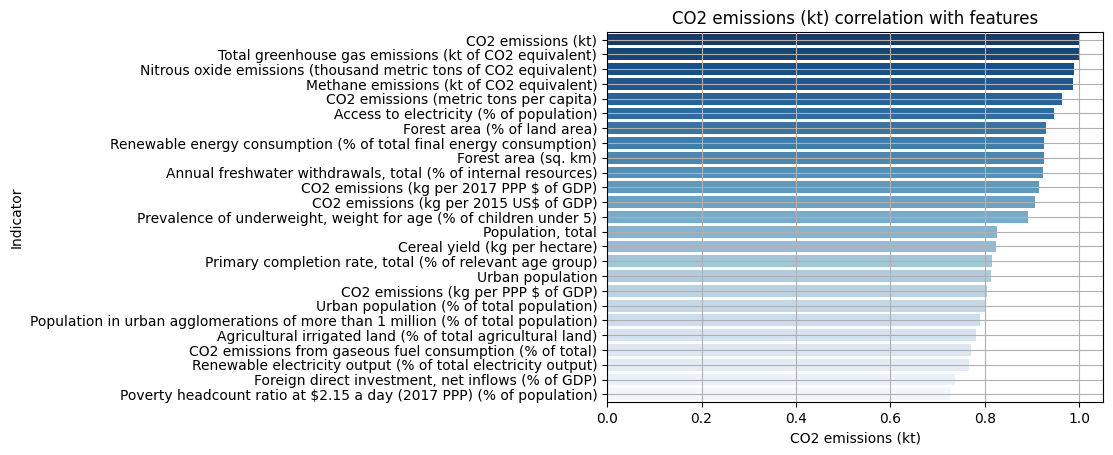

In [213]:
z= df_cor.drop(columns= ['CO2 emissions (kg per 2015 US$ of GDP)','CO2 emissions (kg per 2017 PPP $ of GDP)',
                     'CO2 emissions (kg per PPP $ of GDP)','CO2 emissions (kg per PPP $ of GDP)','CO2 emissions from gaseous fuel consumption (% of total)',
                      'CO2 emissions from gaseous fuel consumption (% of total)'])['CO2 emissions (kt)'].sort_values(ascending=False).head(25)

sns.barplot(y=z.index, x=z, palette='Blues_r')
plt.title("CO2 emissions (kt) correlation with features")
plt.grid(True)

In [26]:
scale = StandardScaler()
X = df_new
scaledX = scale.fit_transform(X)

print(type(scaledX))

<class 'numpy.ndarray'>


In [27]:
df_scaled= pd.DataFrame(scaledX, columns= df_new.columns, index= df_new.index)
df_scaled.head(2)

Indicator  Access to electricity (% of population)  \
1960                                     -0.958392   
1961                                     -0.958392   

Indicator  Agricultural irrigated land (% of total agricultural land)  \
1960                                                        -0.668888   
1961                                                        -0.668888   

Indicator  Agricultural land (% of land area)  Agricultural land (sq. km)  \
1960                                -5.468293                   -5.408244   
1961                                 0.042140                   -0.149048   

Indicator  Agriculture, forestry, and fishing, value added (% of GDP)  \
1960                                                        -2.365572   
1961                                                        -1.824644   

Indicator  Annual freshwater withdrawals, total (% of internal resources)  \
1960                                                            -1.330634   
1961                                                            -1.330634   

Indicator  Annual freshwater withdrawals, total (billion cubic meters)  \
1960                                                         -0.502424   
1961                                                         -0.502424   

Indicator  Arable land (% of land area)  \
1960                          -4.778598   
1961                          -0.351740   

Indicator  Average precipitation in depth (mm per year)  \
1960                                          -4.358055   
1961                                          -0.497240   

Indicator  CO2 emissions (kg per 2015 US$ of GDP)  \
1960                                     -0.95813   
1961                                     -0.95813   

Indicator  CO2 emissions (kg per 2017 PPP $ of GDP)  \
1960                                      -0.960372   
1961                                      -0.960372   

Indicator  CO2 emissions (kg per PPP $ of GDP)  CO2 emissions (kt)  \
1960                                 -0.911685           -0.926936   
1961                                 -0.911685           -0.926936   

Indicator  CO2 emissions (metric tons per capita)  \
1960                                    -0.966984   
1961                                    -0.966984   

Indicator  CO2 emissions from gaseous fuel consumption (% of total)  \
1960                                                      -1.016918   
1961                                                      -1.018100   

Indicator  CO2 emissions from gaseous fuel consumption (kt)  \
1960                                              -1.289097   
1961                                              -1.261640   

Indicator  CO2 emissions from liquid fuel consumption (% of total)  \
1960                                                     -0.162810   
1961                                                     -0.101811   

Indicator  CO2 emissions from liquid fuel consumption (kt)  \
1960                                             -1.509688   
1961                                             -1.458343   

Indicator  CO2 emissions from solid fuel consumption (% of total)  \
1960                                                     0.051938   
1961                                                    -0.055159   

Indicator  CO2 emissions from solid fuel consumption (kt)  \
1960                                            -0.815192   
1961                                            -0.887298   

Indicator  CO2 intensity (kg per kg of oil equivalent energy use)  \
1960                                                    -1.183981   
1961                                                    -1.187645   

Indicator  CPIA public sector management and institutions cluster average (1=low to 6=high)  \
1960                                                                              -0.614042   
1961                                                                              -0.614042   

Indicator  Cereal

In [28]:
# Converting the index as date
df_scaled.index = pd.to_datetime(df_scaled.index)
df_scaled.head(3)

Indicator   Access to electricity (% of population)  \
1960-01-01                                -0.958392   
1961-01-01                                -0.958392   
1962-01-01                                -0.958392   

Indicator   Agricultural irrigated land (% of total agricultural land)  \
1960-01-01                                                   -0.668888   
1961-01-01                                                   -0.668888   
1962-01-01                                                   -0.668888   

Indicator   Agricultural land (% of land area)  Agricultural land (sq. km)  \
1960-01-01                           -5.468293                   -5.408244   
1961-01-01                            0.042140                   -0.149048   
1962-01-01                            0.047176                   -0.137460   

Indicator   Agriculture, forestry, and fishing, value added (% of GDP)  \
1960-01-01                                                   -2.365572   
1961-01-01                                                   -1.824644   
1962-01-01                                                   -1.780084   

Indicator   Annual freshwater withdrawals, total (% of internal resources)  \
1960-01-01                                                       -1.330634   
1961-01-01                                                       -1.330634   
1962-01-01                                                       -1.326661   

Indicator   Annual freshwater withdrawals, total (billion cubic meters)  \
1960-01-01                                                    -0.502424   
1961-01-01                                                    -0.502424   
1962-01-01                                                    -0.502421   

Indicator   Arable land (% of land area)  \
1960-01-01                     -4.778598   
1961-01-01                     -0.351740   
1962-01-01                     -0.346445   

Indicator   Average precipitation in depth (mm per year)  \
1960-01-01                                     -4.358055   
1961-01-01                                     -0.497240   
1962-01-01                                      0.073654   

Indicator   CO2 emissions (kg per 2015 US$ of GDP)  \
1960-01-01                                -0.95813   
1961-01-01                                -0.95813   
1962-01-01                                -0.95813   

Indicator   CO2 emissions (kg per 2017 PPP $ of GDP)  \
1960-01-01                                 -0.960372   
1961-01-01                                 -0.960372   
1962-01-01                                 -0.960372   

Indicator   CO2 emissions (kg per PPP $ of GDP)  CO2 emissions (kt)  \
1960-01-01                            -0.911685           -0.926936   
1961-01-01                            -0.911685           -0.926936   
1962-01-01                            -0.911685           -0.926936   

Indicator   CO2 emissions (metric tons per capita)  \
1960-01-01                               -0.966984   
1961-01-01                               -0.966984   
1962-01-01                               -0.966984   

Indicator   CO2 emissions from gaseous fuel consumption (% of total)  \
1960-01-01                                                 -1.016918   
1961-01-01                                                 -1.018100   
1962-01-01                                                 -1.012395   

Indicator   CO2 emissions from gaseous fuel consumption (kt)  \
1960-01-01                                         -1.289097   
1961-01-01                                         -1.261640   
1962-01-01                                         -1.216594   

Indicator   CO2 emissions from liquid fuel consumption (% of total)  \
1960-01-01                                                -0.162810   
1961-01-01                                                -0.101811   
1962-01-01                                                -0.006551   

Indicator   CO2 emissions from liquid fuel consumption (kt)  \
19

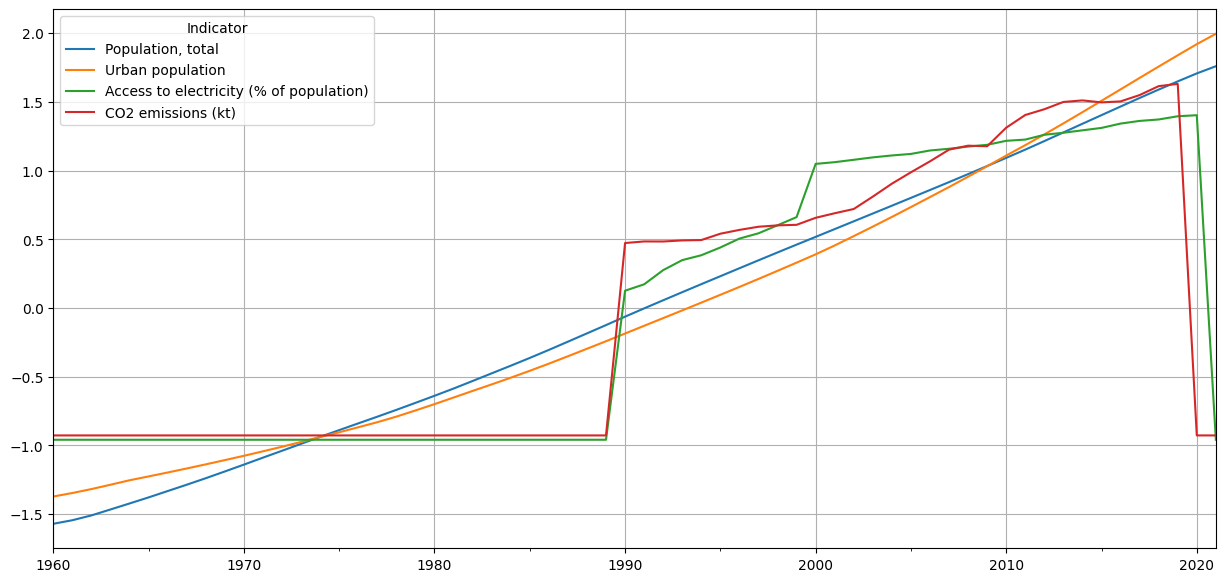

In [29]:
# Co2 emission in comparision with population
df_scaled.columns
y=[ 'Population, total', 'Urban population', 'Access to electricity (% of population)', 'CO2 emissions (kt)']

df_scaled[y].plot(figsize=(15,7))
plt.grid(True)

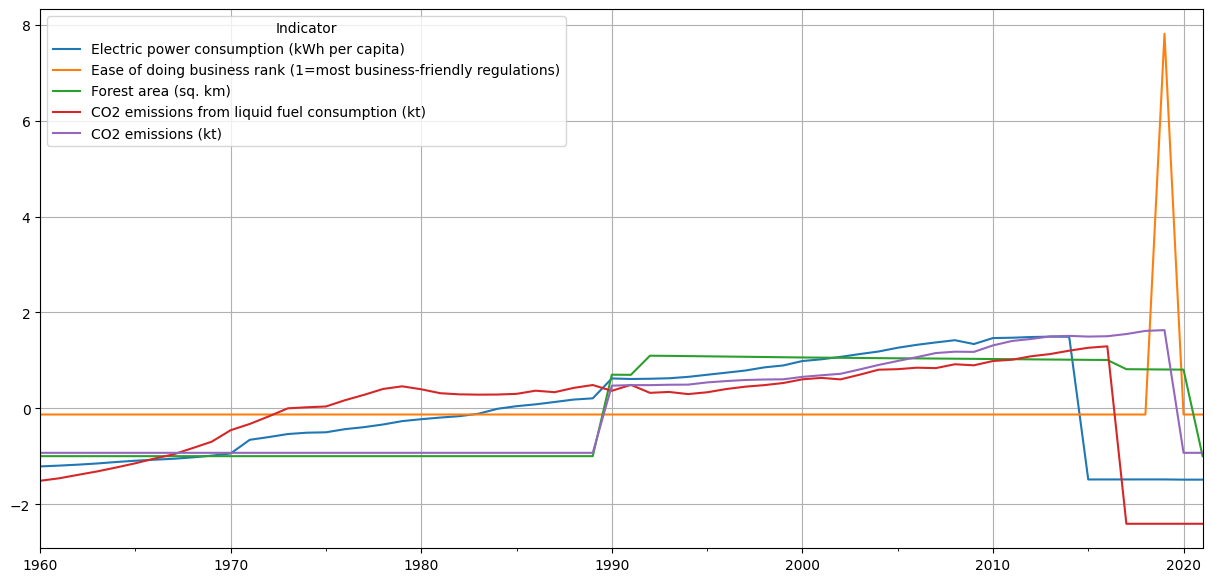

In [30]:
# CO2 production vs. GDP (energy efficiency)
y=[ 'Electric power consumption (kWh per capita)', 'Ease of doing business rank (1=most business-friendly regulations)', 
   'Forest area (sq. km)', 
   'CO2 emissions from liquid fuel consumption (kt)','CO2 emissions (kt)']

df_scaled[y].plot(figsize=(15,7))
plt.grid(True)

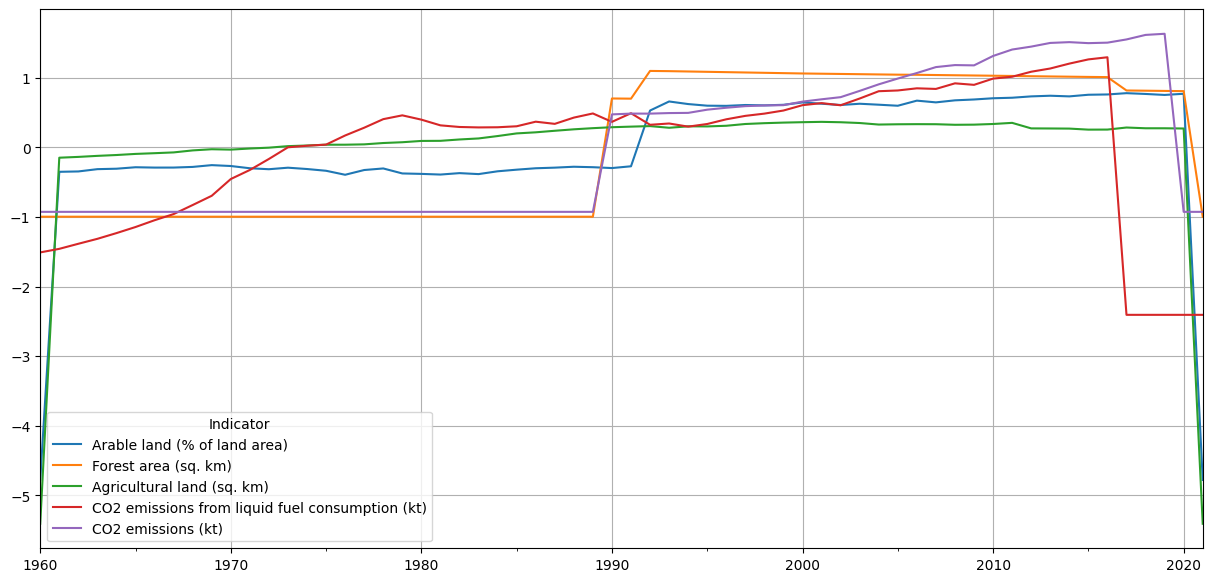

In [31]:
# Arable land vs. land covered by forests (deforestation)
y=[ 'Arable land (% of land area)', 'Forest area (sq. km)', 
   'Agricultural land (sq. km)', 
   'CO2 emissions from liquid fuel consumption (kt)','CO2 emissions (kt)']

df_scaled[y].plot(figsize=(15,7))
plt.grid(True)


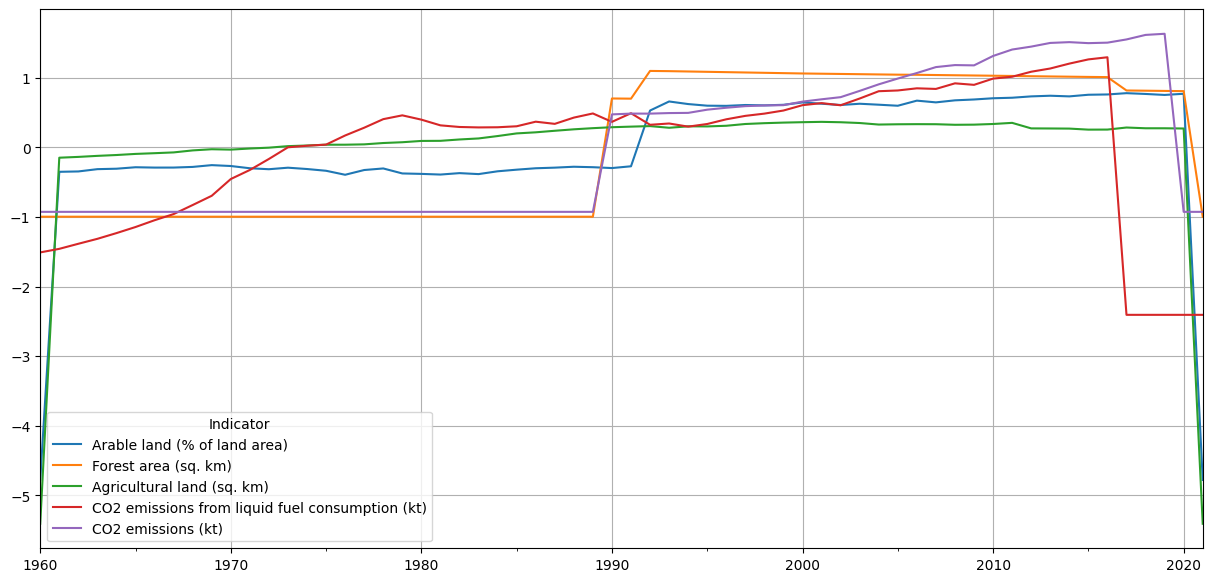

In [32]:
# Electric power consumption, access to electricity, overall energy use and CO2 emission.
# Arable land vs. land covered by forests (deforestation)
y=[ 'Arable land (% of land area)', 'Forest area (sq. km)', 
   'Agricultural land (sq. km)', 
   'CO2 emissions from liquid fuel consumption (kt)','CO2 emissions (kt)']

df_scaled[y].plot(figsize=(15,7))
plt.grid(True)


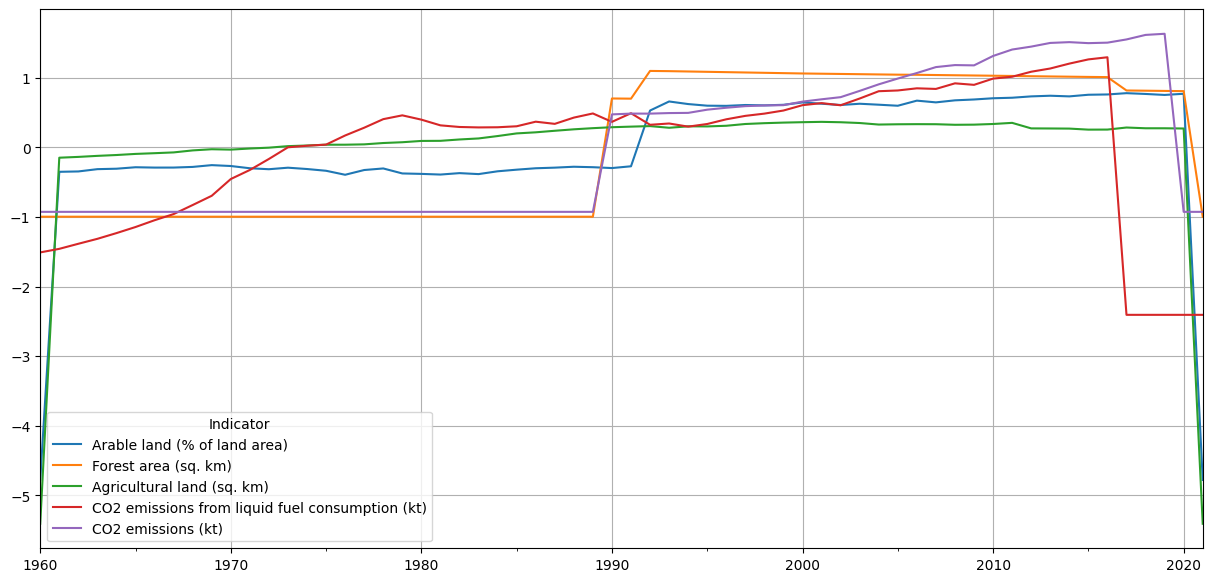

In [33]:
# Agricultural and non-agricultural methane production. How does it link to other parameters like poverty headcount, energy consumption, access to electricity?

# Electric power consumption, access to electricity, overall energy use and CO2 emission.
# Arable land vs. land covered by forests (deforestation)
y=[ 'Arable land (% of land area)', 'Forest area (sq. km)', 
   'Agricultural land (sq. km)', 
   'CO2 emissions from liquid fuel consumption (kt)','CO2 emissions (kt)']

df_scaled[y].plot(figsize=(15,7))
plt.grid(True)


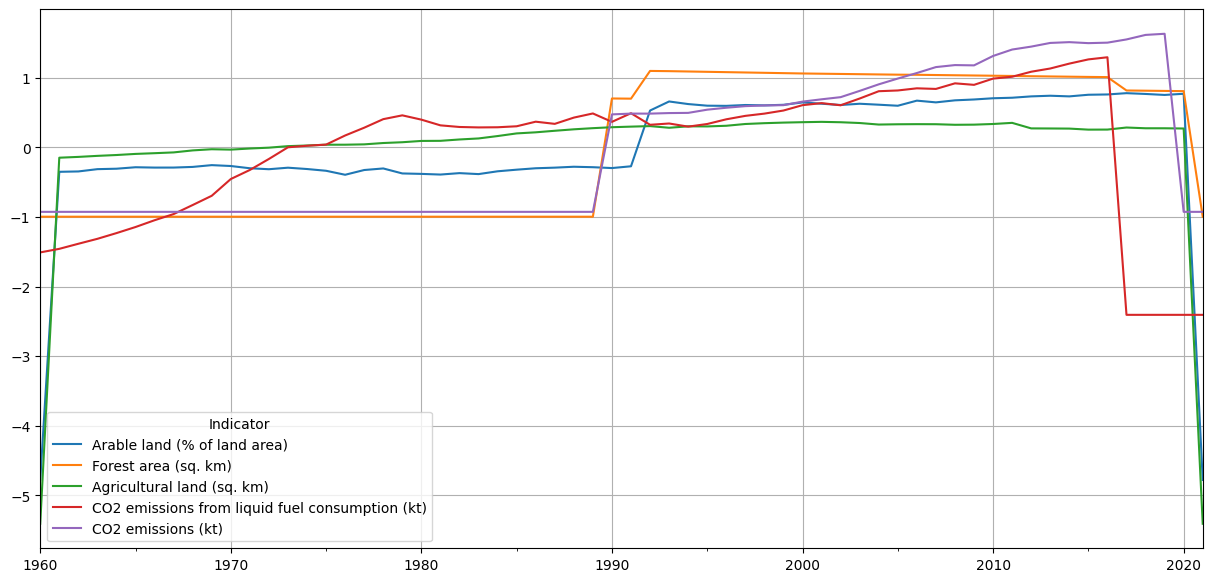

In [34]:
# How does this look for countries in different phases of development? Countries in different parts of the world?

# Electric power consumption, access to electricity, overall energy use and CO2 emission.
# Arable land vs. land covered by forests (deforestation)
y=[ 'Arable land (% of land area)', 'Forest area (sq. km)', 
   'Agricultural land (sq. km)', 
   'CO2 emissions from liquid fuel consumption (kt)','CO2 emissions (kt)']

df_scaled[y].plot(figsize=(15,7))
plt.grid(True)


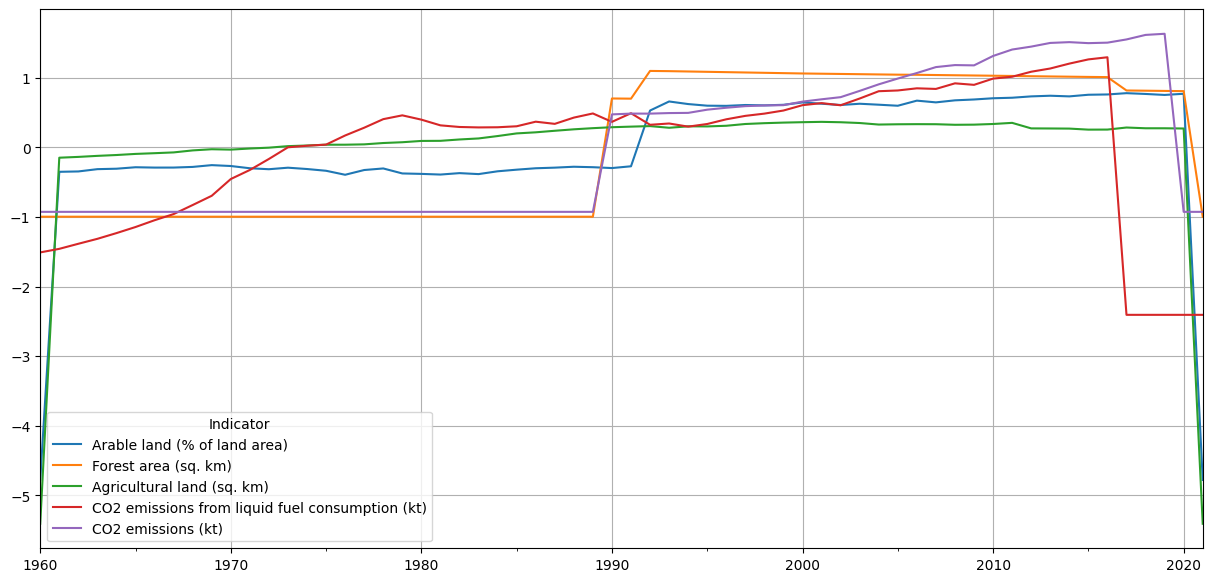

In [35]:
# Numbers per capita (e.g., GDP/head) are often useful.

# Electric power consumption, access to electricity, overall energy use and CO2 emission.
# Arable land vs. land covered by forests (deforestation)
y=[ 'Arable land (% of land area)', 'Forest area (sq. km)', 
   'Agricultural land (sq. km)', 
   'CO2 emissions from liquid fuel consumption (kt)','CO2 emissions (kt)']

df_scaled[y].plot(figsize=(15,7))
plt.grid(True)


In [36]:
df_scaled.columns

Index(['Access to electricity (% of population)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Arable land (% of land area)',
       'Average precipitation in depth (mm per year)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid 

## Analyse country wise

In [96]:
#df[df['Indicator']== 'CO2 emissions (metric tons per capita)'] # CO2 emissions (kt)
# df_co2temp= df_co2.drop(columns= ['Code', 'Indicator', 'IndicatorCode'] )#.set_index('Country')#.T

df_co2temp = df[df['Indicator']== 'CO2 emissions (metric tons per capita)']
print((df_co2temp.isnull().mean()*100).sort_values(ascending= False))#.head(10)
df_co2temp.head(2)

1989             100.000000
1982             100.000000
1976             100.000000
1977             100.000000
1978             100.000000
                    ...    
2002              10.150376
IndicatorCode      0.000000
Code               0.000000
Indicator          0.000000
Country            0.000000
Length: 66, dtype: float64


Country Code                               Indicator  \
41                         Aruba  ABW  CO2 emissions (metric tons per capita)   
117  Africa Eastern and Southern  AFE  CO2 emissions (metric tons per capita)   

      IndicatorCode  1960  1961  1962  1963  1964  1965  1966  1967  1968  \
41   EN.ATM.CO2E.PC   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
117  EN.ATM.CO2E.PC   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  \
41    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
117   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1981  1982  1983  1984  1985  1986  1987  1988  1989      1990      1991  \
41    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN   
117   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.982136  0.937815   

         1992      1993     1994      1995      1996      1997      1998  \
41        NaN       NaN      NaN       NaN       NaN       NaN       NaN   
117  0.902599  0.904581  0.90634  0.926339  0.936869  0.957668  0.958017   

         1999      2000      2001      2002      2003      2004      2005  \
41        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
117  0.896762  0.886254  0.954243  0.956164  0.982878  1.027664  1.002857   

         2006      2007      2008      2009      2010      2011      2012  \
41        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
117  0.991335  1.007822  1.047526  0.985335  1.011807  0.970188  0.983547   

         2013      2014      2015      2016      2017      2018      2019  \
41        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
117  0.995665  1.006938  0.956704  0.938565  0.928508  0.908094  0.903764   

     2020  2021  
41    NaN   NaN  
117   NaN   NaN

In [110]:
fig = px.choropleth(
    df_co2temp.drop(columns= ys, axis=1),
    locations="Code",
    color="2000",
    hover_name="Country",
    hover_data=["2000"],
    title="CO2 Emission(metric tons per capita) Around the world in 2000",
    color_continuous_scale=px.colors.sequential.Blues,
    
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [111]:
df_co2temp = df[df['Indicator']== 'CO2 emissions (metric tons per capita)']
print((df_co2temp.isnull().mean()*100).sort_values(ascending= False))#.head(10)

fig = px.choropleth(
    df_co2temp,
    locations="Code",
    color="2019",
    hover_name="Country",
    hover_data=["2019"],
    title="CO2 Emission(metric tons per capita) Around the world in 2019",
    color_continuous_scale=px.colors.sequential.Blues,
    
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [141]:
# As we can see above there are few columns with 100% missing values, lets remove them
df_co2temp.dropna(thresh =100, axis=1, inplace = True) ## drop all columns with null value
df_co2temp.dropna(thresh =30, axis=0, inplace=True) ## drop all rows with nan value more than 30%

# Since we are dealing same indicator lets drop indicator, indicatorcode and country code and set country as index
df_co2temp.drop(columns=['Indicator','Code','IndicatorCode'], inplace = True)
df_co2temp=df_co2temp.set_index('Country')


df_co2temp.head(3)

<ipython-input-141-b9fc5b7ed7a3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-b9fc5b7ed7a3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-b9fc5b7ed7a3>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1990      1991      1992      1993      1994  \
Country                                                                         
Africa Eastern and Southern  0.982136  0.937815  0.902599  0.904581  0.906340   
Afghanistan                  0.222538  0.207535  0.115282  0.095689  0.083465   
Africa Western and Central   0.473669  0.525418  0.563118  0.518770  0.466821   

                                 1995      1996      1997      1998      1999  \
Country                                                                         
Africa Eastern and Southern  0.926339  0.936869  0.957668  0.958017  0.896762   
Afghanistan                  0.075523  0.068979  0.061837  0.056237  0.042050   
Africa Western and Central   0.497312  0.559529  0.544999  0.510474  0.506916   

                                 2000      2001      2002      2003      2004  \
Country                                                                         
Africa Eastern and Southern  0.886254  0.954243  0.956164  0.982878  1.027664   
Afghanistan                  0.038889  0.037077  0.049047  0.053875  0.043730   
Africa Western and Central   0.525719  0.539255  0.497136  0.515363  0.501186   

                                 2005      2006      2007      2008      2009  \
Country                                                                         
Africa Eastern and Southern  1.002857  0.991335  1.007822  1.047526  0.985335   
Afghanistan                  0.063495  0.069174  0.068331  0.134710  0.178198   
Africa Western and Central   0.501186  0.467292  0.435300  0.449222  0.423465   

                                 2010      2011      2012      2013      2014  \
Country                                                                         
Africa Eastern and Southern  1.011807  0.970188  0.983547  0.995665  1.006938   
Afghanistan                  0.252220  0.305308  0.265210  0.189910  0.149162   
Africa Western and Central   0.464419  0.468718  0.472242  0.499219  0.506918   

                                 2015      2016      2017      2018      2019  
Country                                                                        
Africa Eastern and Southern  0.956704  0.938565  0.928508  0.908094  0.903764  
Afghanistan                  0.176278  0.153019  0.134106  0.165455  0.160976  
Africa Western and Central   0.485478  0.490807  0.474882  0.478305  0.485884

In [86]:
df_co2temp= df_co2temp.T
df_co2temp.index = pd.to_datetime(df_co2temp.index)

Country     Africa Eastern and Southern  Afghanistan  \
1990-01-01                     0.982136     0.222538   
1991-01-01                     0.937815     0.207535   
1992-01-01                     0.902599     0.115282   

Country     Africa Western and Central    Angola   Albania   Andorra  \
1990-01-01                    0.473669  0.554586  1.819542  7.653680   
1991-01-01                    0.525418  0.545439  1.242810  7.396183   
1992-01-01                    0.563118  0.544627  0.683700  7.157446   

Country     Arab World  United Arab Emirates  Argentina   Armenia  \
1990-01-01    2.815685             29.055586   3.073750  5.581269   
1991-01-01    2.765204             30.651524   3.199443  5.719212   
1992-01-01    2.928581             28.210531   3.215237  3.049331   

Country     Antigua and Barbuda  Australia   Austria  Azerbaijan   Burundi  \
1990-01-01             3.316069  15.448463  7.589364    7.453451  0.031000   
1991-01-01             3.457271  15.318181  8.049114    7.159655  0.039322   
1992-01-01             4.485068  15.355890  7.353927    8.616848  0.031342   

Country       Belgium     Benin  Burkina Faso  Bangladesh  Bulgaria  \
1990-01-01  10.966775  0.064285      0.054756    0.107515  8.443170   
1991-01-01  11.390890  0.051010      0.054458    0.099137  6.815049   
1992-01-01  11.182502  0.051303      0.054175    0.106226  6.482311   

Country       Bahrain  Bahamas, The  Bosnia and Herzegovina   Belarus  \
1990-01-01  20.756912      7.241049                5.333410  9.797487   
1991-01-01  19.330799      7.389751                4.761920  9.438839   
1992-01-01  22.129241      9.114348                3.735035  8.612564   

Country       Belize   Bolivia    Brazil  Barbados  Brunei Darussalam  \
1990-01-01  1.807338  1.466984  1.313149  3.785713          12.446168   
1991-01-01  2.306100  1.500368  1.340060  3.777920          12.525013   
1992-01-01  2.627444  1.507894  1.333348  4.534764          12.940854   

Country       Bhutan  Botswana  Central African Republic     Canada  \
1990-01-01  0.143256  2.094711                  0.053396  15.148890   
1991-01-01  0.228990  1.977424                  0.048308  14.741014   
1992-01-01  0.219803  2.322807                  0.050138  15.028234   

Country     Central Europe and the Baltics  Switzerland     Chile     China  \
1990-01-01                        8.930848     6.452219  2.287364  1.914543   
1991-01-01                        8.265723     6.716198  2.160457  2.000539   
1992-01-01                        7.708553     6.646921  2.199924  2.075744   

Country     Cote d'Ivoire  Cameroon  Congo, Dem. Rep.  Congo, Rep.  Colombia  \
1990-01-01       0.227530  0.253707          0.088364     1.341474  1.494721   
1991-01-01       0.225559  0.591795          0.046781     1.300621  1.515961   
1992-01-01       0.215760  0.564781          0.038610     1.241591  1.547186   

Country      Comoros  Cabo Verde  Costa Rica  Caribbean small states  \
1990-01-01  0.162368    0.274301    0.908730                4.552781   
1991-01-01  0.158272    0.268297    0.944615                4.573611   
1992-01-01  0.154529    0.287998    1.249270                4.841988   

Country         Cuba    Cyprus    Czechia    Germany  Djibouti  Dominica  \
1990-01-01  3.351941  5.821179  14.535453  12.026609  0.467797  0.863545   
1991-01-01  2.559313  6.395006  13.280202  11.654851  0.461401  0.867792   
1992-01-01  2.018779  6.761834  12.999167  11.073792  0.481389  1.157541   

Country       Denmark  Dominican Republic   Algeria  \
1990-01-01  10.132390            1.102538  2.466487   
1991-01-01  12.184006            1.130743  2.541909   
1992-01-01  11.028025            1.295215  2.498850   

Country     East Asia & Pacific (excluding high income)  \
1990-01-01                                     1.668698   
1991-01-01                                     1.740518   
1992-01-01                                     1.793063   

Country     Early-demographic dividend  East Asia 

<Axes: >

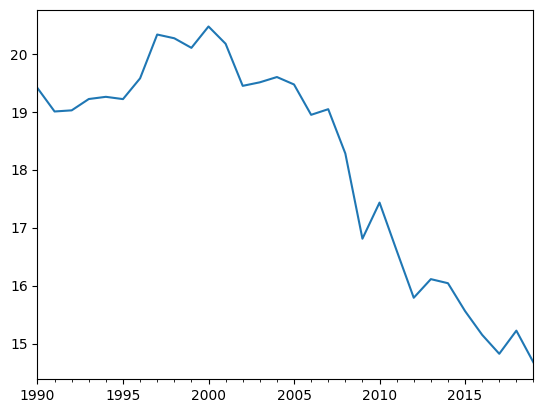

In [88]:
display(df_co2temp.head(3))
df_co2temp['United States'].plot()

In [93]:
df_co2temp.sum().sort_values(ascending= False).head(15).index

Index(['Qatar', 'United Arab Emirates', 'Kuwait', 'Bahrain', 'Luxembourg',
       'United States', 'North America', 'Australia', 'Canada',
       'Brunei Darussalam', 'Saudi Arabia', 'Estonia', 'Oman', 'Kazakhstan',
       'Russian Federation'],
      dtype='object', name='Country')

<ipython-input-157-141e30700955>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'USA'}>

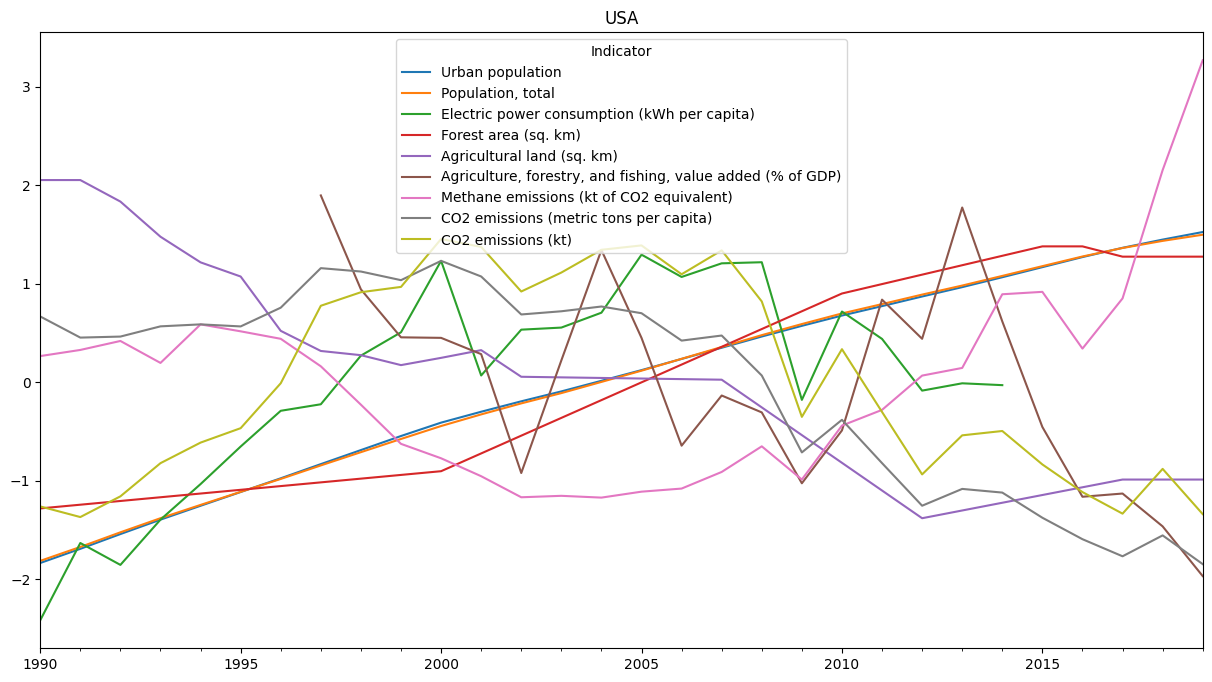

In [157]:
df_usa = df[df['Country']=='United States']
df_usa.drop(columns= ['Country','Code','IndicatorCode'], inplace=True)
df_usa.set_index('Indicator', inplace=True)
df_usa= df_usa.T
df_usa.index = pd.to_datetime(df_usa.index)
df_usa.columns
col= [ 'Urban population','Population, total','Electric power consumption (kWh per capita)','Forest area (sq. km)',
      'Agricultural land (sq. km)','Agriculture, forestry, and fishing, value added (% of GDP)',
      'Methane emissions (kt of CO2 equivalent)',
      'CO2 emissions (metric tons per capita)','CO2 emissions (kt)']


### Scale
scale = StandardScaler()
X = df_usa[col]
scaledX = scale.fit_transform(X)
df_con_scaled= pd.DataFrame(scaledX, columns= X.columns, index= X.index)
df_con_scaled.head(2)

df_con_scaled.plot(figsize=(15,8), title= "USA")

<ipython-input-94-8cb515c1ab91>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2temp.dropna(thresh =100, axis=1, inplace = True) ## drop all columns with null value
<ipython-input-94-8cb515c1ab91>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2temp.dropna(thresh =30, axis=0, inplace=True) ## drop all rows with nan value more than 30%
<ipython-input-94-8cb515c1ab91>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2

Country     Africa Eastern and Southern  Afghanistan  \
1990-01-01                  304354.8827       2380.0   
1991-01-01                  298735.4356       2230.0   
1992-01-01                  295090.0000       1390.0   

Country     Africa Western and Central  Angola  Albania  Andorra   Arab World  \
1990-01-01                 97925.79689  6560.0   5980.0    410.0  636128.9932   
1991-01-01                111479.47050  6670.0   4060.0    410.0  638311.6162   
1992-01-01                122740.53320  6880.0   2220.0    410.0  692897.3074   

Country     United Arab Emirates  Argentina  Armenia  Antigua and Barbuda  \
1990-01-01               55210.0   100320.0  19850.0                210.0   
1991-01-01               61560.0   105920.0  20690.0                220.0   
1992-01-01               59700.0   107930.0  10900.0                290.0   

Country     Australia  Austria  Azerbaijan  Burundi   Belgium  Benin  \
1990-01-01   263630.0  58270.0     53480.0    170.0  109310.0  330.0   
1991-01-01   264760.0  62420.0     52060.0    220.0  113960.0  270.0   
1992-01-01   268400.0  57660.0     63610.0    180.0  112330.0  280.0   

Country     Burkina Faso  Bangladesh  Bulgaria  Bahrain  Bahamas, The  \
1990-01-01         500.0     11520.0   73610.0  10740.0        1960.0   
1991-01-01         510.0     10830.0   58830.0  10350.0        2040.0   
1992-01-01         520.0     11820.0   55360.0  12270.0        2570.0   

Country     Bosnia and Herzegovina  Belarus  Belize  Bolivia    Brazil  \
1990-01-01                 23970.0  99830.0   330.0  10410.0  197900.0   
1991-01-01                 21440.0  96220.0   430.0  10870.0  205480.0   
1992-01-01                 15970.0  87990.0   500.0  11150.0  207870.0   

Country     Barbados  Brunei Darussalam  Bhutan  Botswana  \
1990-01-01     980.0             3260.0    80.0    2810.0   
1991-01-01     980.0             3380.0   130.0    2730.0   
1992-01-01    1180.0             3590.0   120.0    3300.0   

Country     Central African Republic    Canada  \
1990-01-01                     150.0  419490.0   
1991-01-01                     140.0  413300.0   
1992-01-01                     150.0  426370.0   

Country     Central Europe and the Baltics  Switzerland    Chile      China  \
1990-01-01                        989030.0      43330.0  30520.0  2173360.0   
1991-01-01                        913110.0      45670.0  29300.0  2302180.0   
1992-01-01                        848800.0      45700.0  30320.0  2418180.0   

Country     Cote d'Ivoire  Cameroon  Congo, Dem. Rep.  Congo, Rep.  Colombia  \
1990-01-01         2710.0    2900.0            3180.0       3200.0   48730.0   
1991-01-01         2790.0    6970.0            1740.0       3190.0   50440.0   
1992-01-01         2770.0    6850.0            1480.0       3130.0   52510.0   

Country     Comoros  Cabo Verde  Costa Rica  Caribbean small states     Cuba  \
1990-01-01     70.0       100.0      2870.0                 27580.0  35620.0   
1991-01-01     70.0       100.0      3060.0                 27900.0  27420.0   
1992-01-01     70.0       110.0      4150.0                 29790.0  21770.0   

Country     Cyprus   Czechia   Germany  Djibouti  Dominica  Denmark  \
1990-01-01  4590.0  150200.0  955310.0     270.0      60.0  52090.0   
1991-01-01  5110.0  136900.0  932550.0     290.0      60.0  62800.0   
1992-01-01  5480.0  134140.0  892820.0     300.0      80.0  57030.0   

Country     Dominican Republic  Algeria  \
1990-01-01              7860.0  62940.0   
1991-01-01              8230.0  66430.0   
1992-01-01              9620.0  66840.0   

Country     East Asia & Pacific (excluding high income)  \
1990-01-01                                  2672061.774   
1991-01-01                                  2830000.842   
1992-01-01                                  2957304.271   

Country     Early-demographic dividend  East Asia & Pacific  \
1990-01-01                 2616614.022          4510718.560   
1991-01-01                 2742521.5

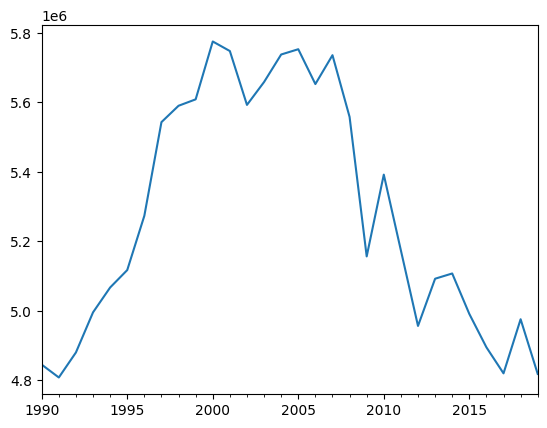

Country
World                                          8.128989e+08
IDA & IBRD total                               4.414388e+08
Low & middle income                            4.247979e+08
IBRD only                                      4.231012e+08
Middle income                                  4.195487e+08
High income                                    3.811566e+08
OECD members                                   3.698748e+08
Post-demographic dividend                      3.507604e+08
Upper middle income                            3.132832e+08
Late-demographic dividend                      3.005317e+08
East Asia & Pacific                            2.845352e+08
East Asia & Pacific (excluding high income)    2.108674e+08
East Asia & Pacific (IDA & IBRD countries)     2.088662e+08
Europe & Central Asia                          2.000793e+08
China                                          1.807228e+08
dtype: float64

In [94]:
#df[df['Indicator']== 'CO2 emissions (metric tons per capita)'] # CO2 emissions (kt)
# df_co2temp= df_co2.drop(columns= ['Code', 'Indicator', 'IndicatorCode'] )#.set_index('Country')#.T

df_co2temp = df[df['Indicator']== 'CO2 emissions (kt)']
(df_co2temp.isnull().mean()*100).sort_values(ascending= False)#.head(10)

# As we can see above there are few columns with 100% missing values, lets remove them
df_co2temp.dropna(thresh =100, axis=1, inplace = True) ## drop all columns with null value
df_co2temp.dropna(thresh =30, axis=0, inplace=True) ## drop all rows with nan value more than 30%

# Since we are dealing same indicator lets drop indicator, indicatorcode and country code and set country as index
df_co2temp.drop(columns=['Indicator','Code','IndicatorCode'], inplace = True)
df_co2temp=df_co2temp.set_index('Country')

df_co2temp= df_co2temp.T
df_co2temp.index = pd.to_datetime(df_co2temp.index)

display(df_co2temp.head(3))
df_co2temp['United States'].plot()

plt.show()
df_co2temp.sum().sort_values(ascending= False).head(15)

In [50]:
y=['CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'CO2 emissions from solid fuel consumption (kt)']

df[df['Indicator'].isin(y)].isnull().mean().sort_values(ascending= False)

2021             1.000000
2020             1.000000
1960             0.647642
1961             0.644566
1962             0.639781
                   ...   
2013             0.099111
Indicator        0.000000
IndicatorCode    0.000000
Code             0.000000
Country          0.000000
Length: 66, dtype: float64

In [44]:
## For heat map
!pip install pyshp
import numpy as np
import shapefile as shp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.1 MB/s eta 0:00:00


In [ ]:
df